<a href="https://colab.research.google.com/github/AnshulSharma2004/MachineLearning/blob/main/DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# check the dupilcated row
df.duplicated().sum()

0

In [ ]:
# check the categorical and numerical columns
categorical_columns = [feature for feature in df.columns if df[feature].dtype == 'object']
numerical_columns = [feature for feature in df.columns if df[feature].dtype != 'object']
print(categorical_columns)
print(numerical_columns)

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


In [ ]:
# check the unique values in categorical column
df[categorical_columns].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

In [ ]:
df['Ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

In [ ]:
df.drop(['Name', 'Ticket'], inplace=True, axis = 1)

In [ ]:
df.shape

(891, 10)

In [ ]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [ ]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
df.dropna(subset=['Embarked'], inplace = True, axis = 0)
df.shape

(889, 9)

In [ ]:
# we can use Mean and Median imputation for handle missing values
# Mean imputation is used when data is normally distrubuted and no outliers
# Median can use when we have outliers and skewed data

df.fillna(df['Age'].mean(), inplace=True)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

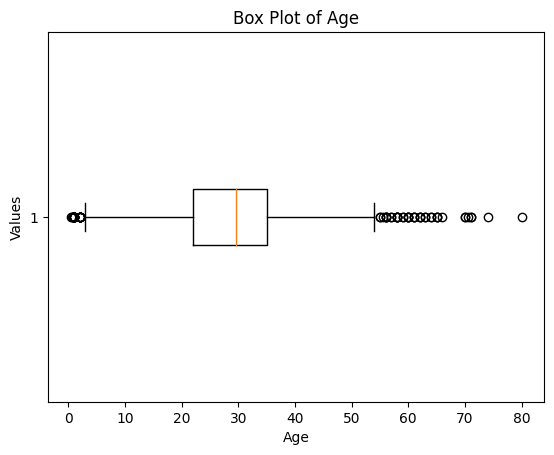

In [ ]:
# checking the outliers using box plot
import matplotlib.pyplot as plt

plt.boxplot(df['Age'], vert=False)
plt.xlabel('Age')
plt.ylabel('Values')
plt.title('Box Plot of Age')
plt.show()

In [ ]:
mean = df['Age'].mean()
std = df['Age'].std()
lower_limit = mean - std*2
upper_limit = mean + std*2

print(lower_limit, upper_limit)

3.7054001079256587 55.57878528533277


In [ ]:
# Dropping the outliers
df = df[(df['Age'] >= lower_limit) & (df['Age'] <= upper_limit)]
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


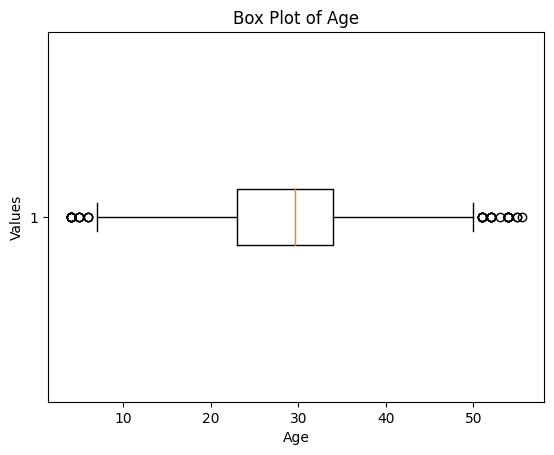

In [ ]:
plt.boxplot(df['Age'], vert=False)
plt.xlabel('Age')
plt.ylabel('Values')
plt.title('Box Plot of Age')
plt.show()

In [ ]:
X = df[['Pclass','Sex','Age', 'SibSp','Parch','Fare','Embarked']]
Y = df['Survived']


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_col = [feature for feature in X.columns if X[feature].dtype != 'object']
X_scaled = pd.DataFrame(scaler.fit_transform(X[num_col]), columns=num_col)
X_scaled

,Pclass,Age,SibSp,Parch,Fare
0,1.0,0.349515,0.125,0.000000,0.014151
1,0.0,0.660194,0.125,0.000000,0.139136
2,1.0,0.427184,0.000,0.000000,0.015469
3,0.0,0.601942,0.125,0.000000,0.103644
4,1.0,0.601942,0.000,0.000000,0.015713
...,...,...,...,...,...
816,0.5,0.446602,0.000,0.000000,0.025374
817,0.0,0.291262,0.000,0.000000,0.058556
818,1.0,0.497905,0.125,0.333333,0.045771
819,0.0,0.427184,0.000,0.000000,0.058556
